# Điều chế và giải điều chế tín hiệu sử dụng phương pháp khóa tần số (FSK) từ một chuỗi nhị phân bất kì
- Chọn 2-FSK

1. Điều chế

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.signal import welch
from scipy import signal

+ Tạo chuỗi nhị phân ngẫu nhiên, độ dài 30 bit

In [3]:
x = np.random.randint(2,size=30)
N = len(x)

In [4]:
Tb = 0.0001
nb = 100
t1 = np.arange(Tb/nb,nb*N*(Tb/nb)+(Tb/nb),Tb/nb)

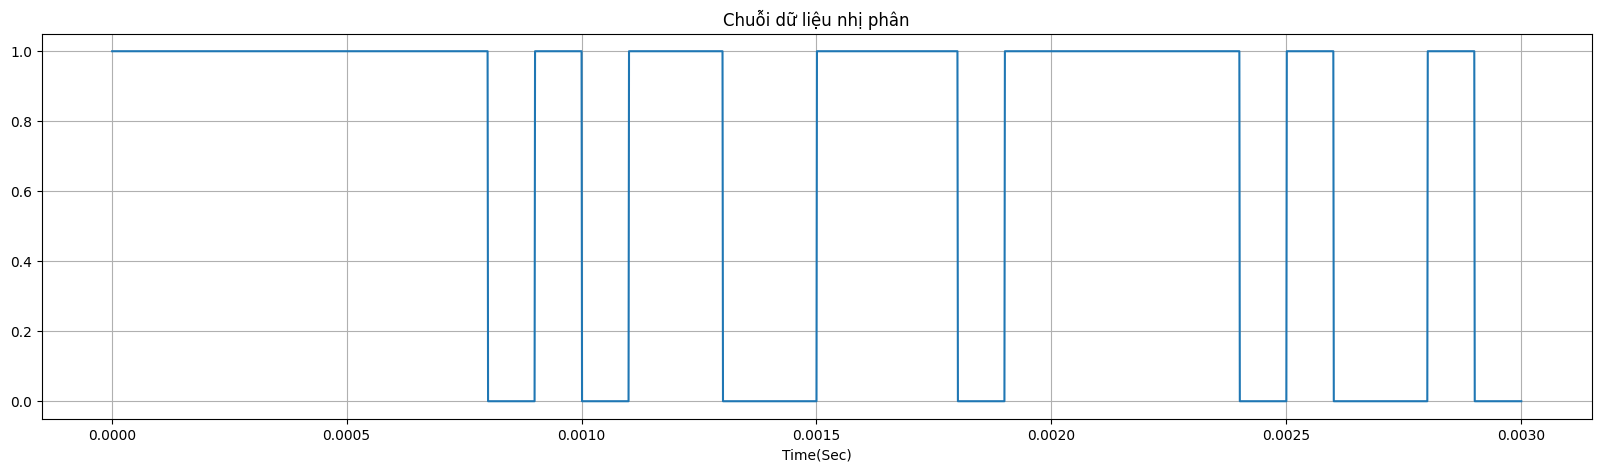

In [6]:
digit = np.empty((0,1), int)
for n in range(0,N):
    if x[n] == 1:
        sig = np.ones(nb)
    else:
        sig = np.zeros(nb)
    digit = np.append(digit, sig)
digit.reshape(-1)
plt.title("Chuỗi dữ liệu nhị phân")
plt.xlabel('Time(Sec)')
plt.rcParams['figure.figsize'] = [20, 5]
plt.grid()
plt.plot(t1,digit)

+ Khởi tạo và biểu diễn sóng mang s(t) trên đồ thị

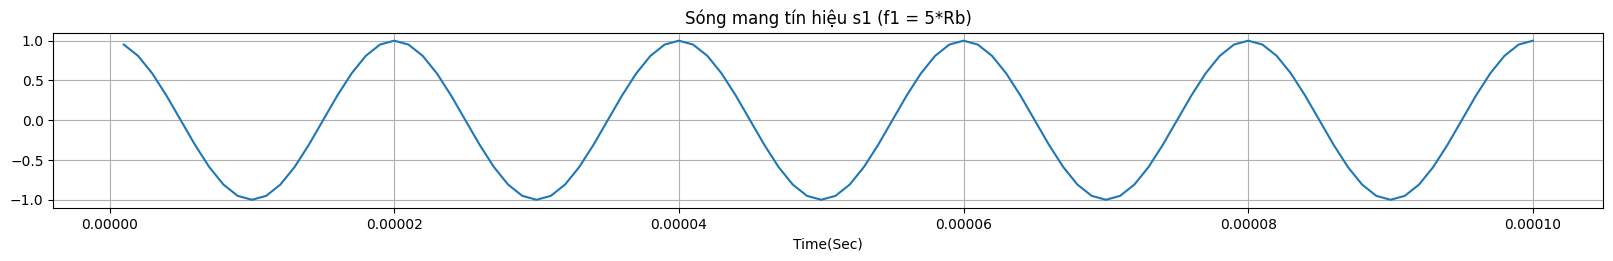

In [12]:
t2 = np.arange(Tb/nb,nb*(Tb/nb)+(Tb/nb),Tb/nb)
br = 1/Tb
fc1 = br*5
cs1 = np.cos(2*np.pi*fc1*t2)
plt.subplot(2, 1, 1)
plt.title("Sóng mang tín hiệu s1 (f1 = 5*Rb)")
plt.plot(t2, cs1)
plt.xlabel('Time(Sec)')
plt.grid()
plt.show()

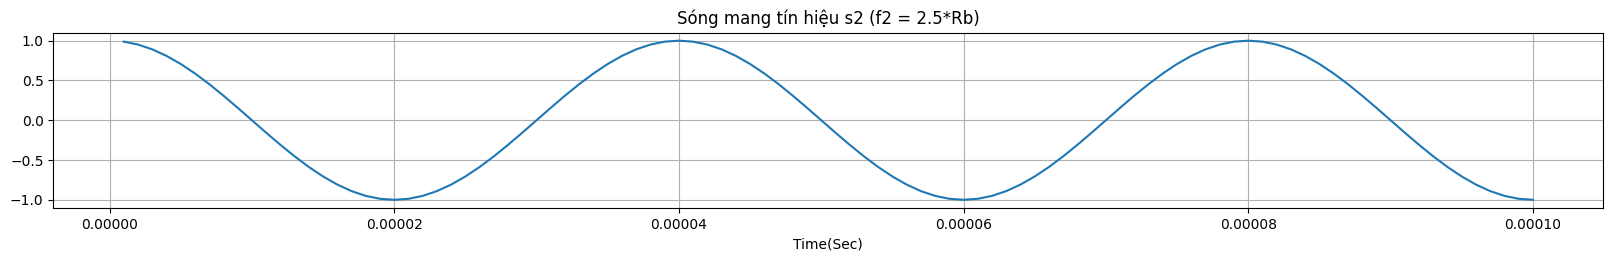

In [13]:
fc2 = br*2.5
cs2 = np.cos(2*np.pi*fc2*t2)
plt.subplot(2, 1, 1)
plt.title("Sóng mang tín hiệu s2 (f2 = 2.5*Rb)")
plt.xlabel('Time(Sec)')
plt.plot(t2, cs2)
plt.grid()
plt.show()

+ Biểu diễn điều chế khóa dịch tần và biểu diễn tín hiệu sau khi điều chế

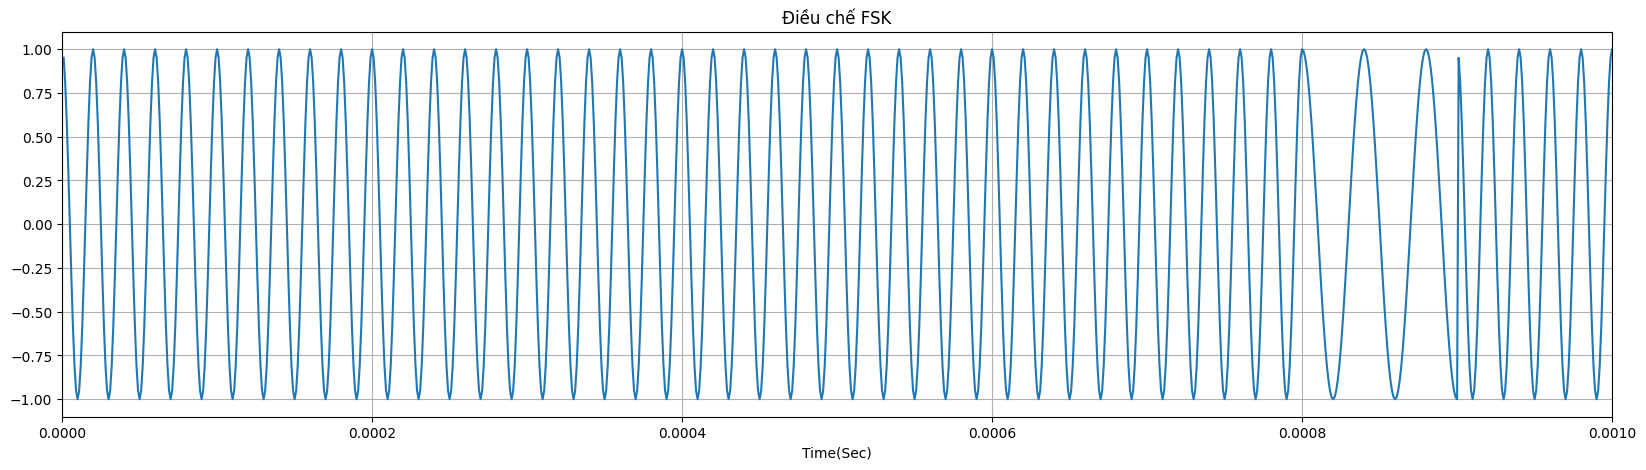

In [15]:
mod = np.empty((0,1), int)
for i in range(0,N):
    if x[i] == 1:
        y = cs1
    else:
        y = cs2
    mod = np.append(mod, y)   # s1 <-> bit 1, s2 <-> bit 0
plt.title("Điều chế FSK")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t1, mod)
plt.xlim(0.0000, 0.001)
plt.show()

2. Giải điều chế 

+ Tương quan tín hiệu điều chế FSK với tín hiệu sóng mang để tạo các biến quyết định

In [9]:
s = len(t2)
demod = np.empty((0,1), int)
for n in range(s, len(mod)+1, s):
    mm1 = cs1*mod[(n-(s)):n]
    mm2 = cs2*mod[(n-(s)):n]
    z1 = np.trapz(t2,mm1)
    z2 = np.trapz(t2,mm2)
    rz1 = np.round(2*z1/Tb)
    rz2 = np.round(2*z2/Tb)
    if rz1 > 0.5:
        a = 1
    elif rz2 > 0.5:
        a = 0
    demod = np.append(demod, a)

+ Lấy dữ liệu nhị phân giải điều chế dựa trên các biến quyết định và vẽ sau chuỗi nhị phân giải điều chế

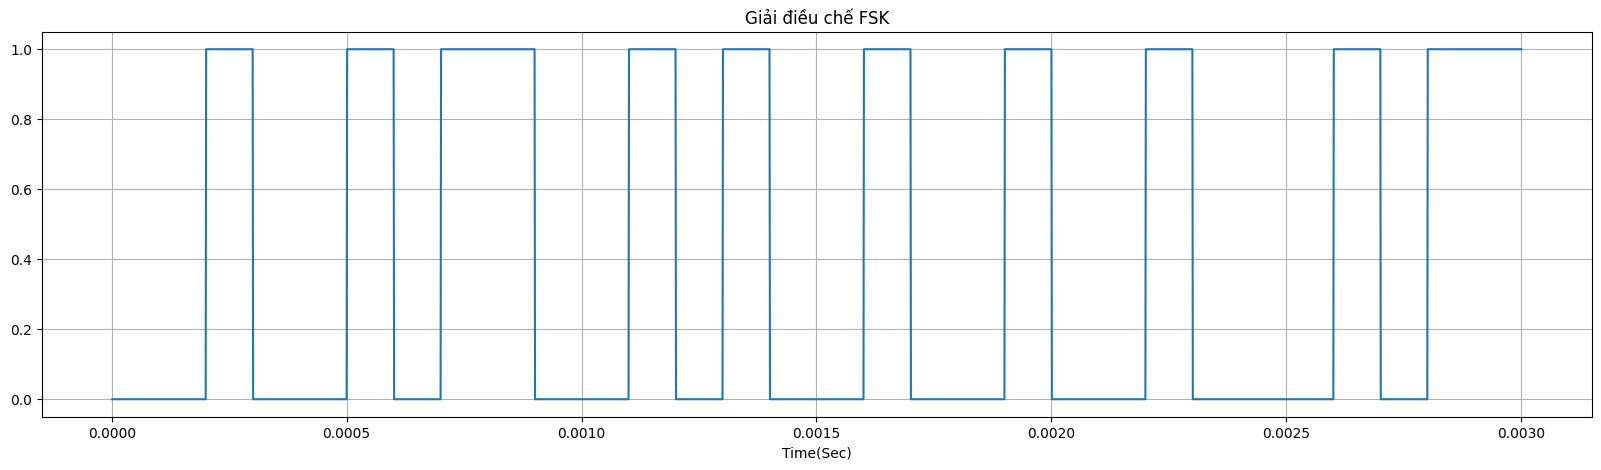

In [10]:
rdigit = np.empty((0,1), int)
for n in range(0, len(demod)):
    if demod[n] == 1:
        rsig = np.ones(nb)
    else:
        rsig = np.zeros(nb)
    rdigit = np.append(rdigit, rsig)
t3 = np.arange(Tb/nb,nb*len(demod)*(Tb/nb)+(Tb/nb),Tb/nb)
plt.title("Giải điều chế FSK")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t3, rdigit)
plt.show()

3. Khảo sát điều chế/giải điều chế khóa pha dưới tác dụng của nhiễu AWGN

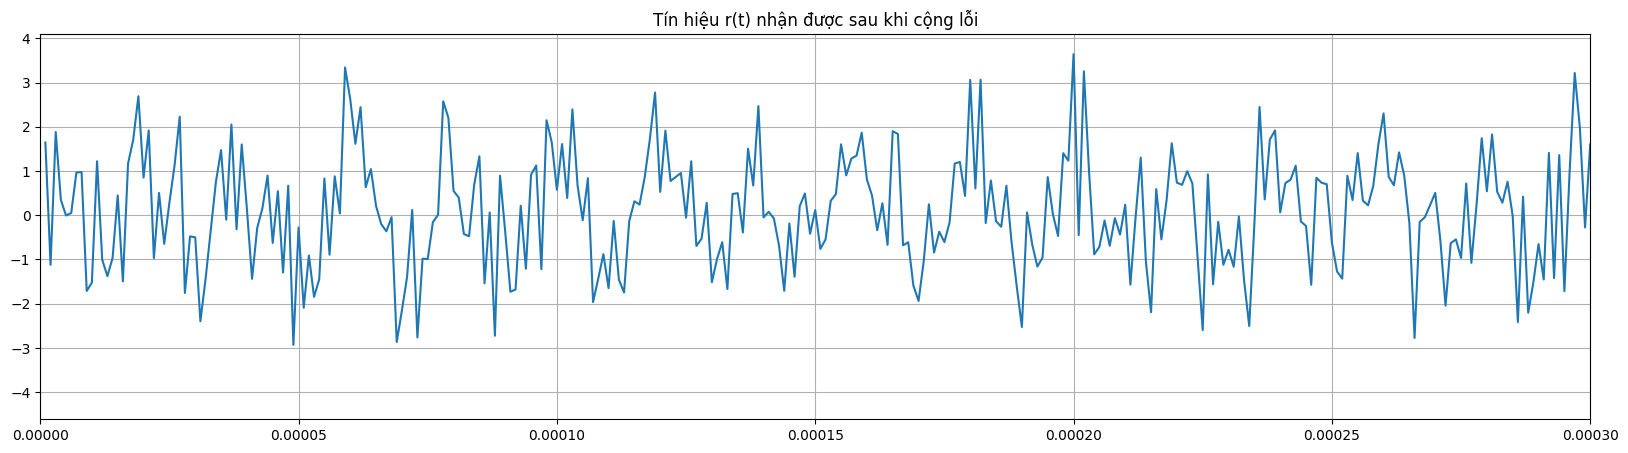

In [16]:
noise = np.random.normal(0,1,len(t1))
rt = mod + noise
plt.title("Tín hiệu r(t) nhận được sau khi cộng lỗi")
plt.plot(t1,rt)
plt.xlim(0.0000, 0.0003)
plt.grid()

1.0437351972953166


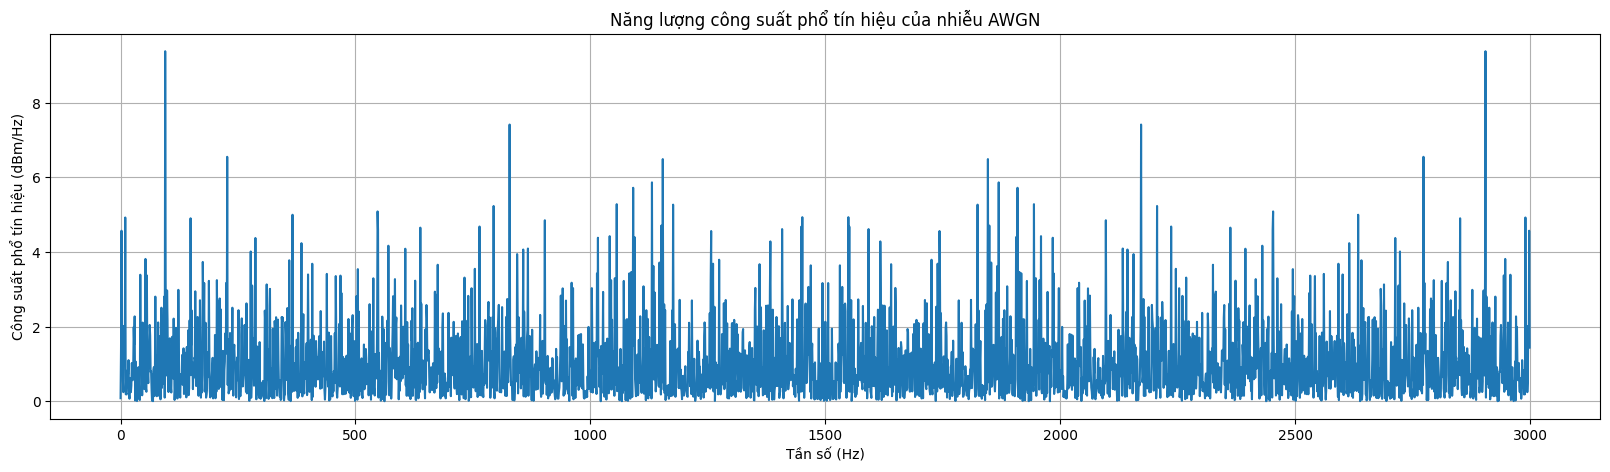

In [27]:
N = 3000
# Nhiễu trong kênh AWGN với trung bình = 0, độ lệch chuẩn = 1
# Tính mật độ công suất phổ tín hiệu
noise_fft = np.abs(np.fft.fft(noise))
noise_psd = noise_fft ** 2 / N
print(np.mean(noise_psd))

# Biểu diễn mật độ công suất phổ tín hiệu theo tần số
f = np.linspace(0, N-1, N)
plt.plot(f, noise_psd)
plt.xlabel('Tần số (Hz)')
plt.ylabel('Công suất phổ tín hiệu (dBm/Hz)')
plt.title('Năng lượng công suất phổ tín hiệu của nhiễu AWGN')
plt.grid()
plt.show()

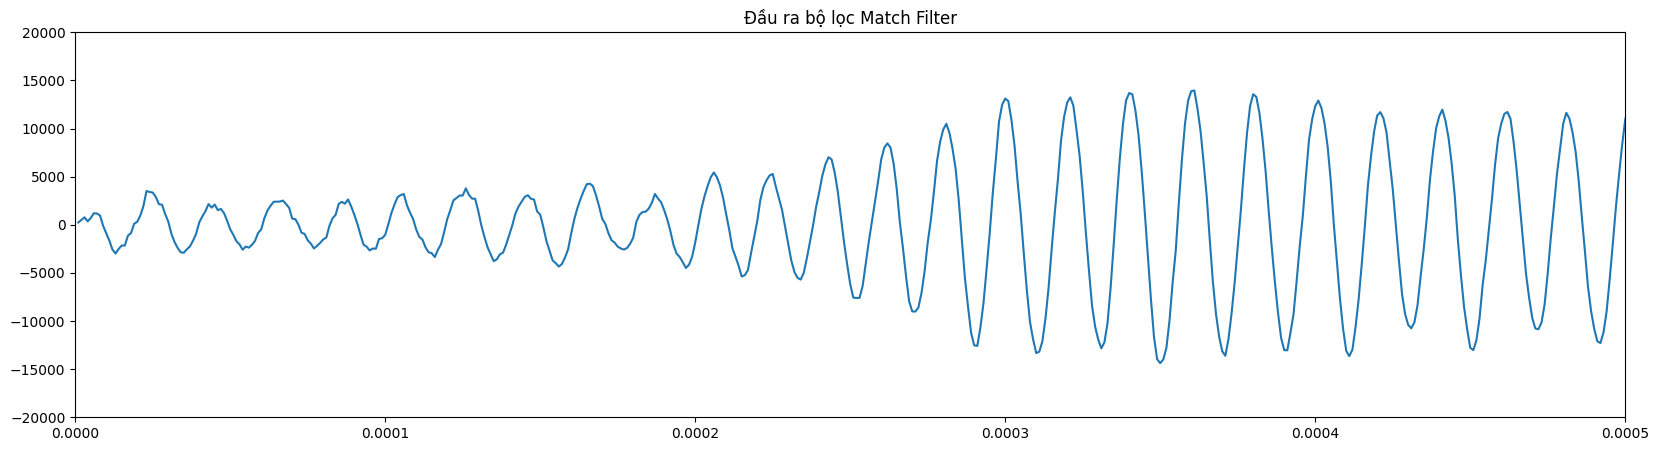

In [33]:
T = 1/fc1
b1 = np.sqrt(2/T)*np.cos(2*np.pi*fc1*t1)
tichchap = np.convolve(b1,rt)
tichchap = tichchap[:len(t1)]
plt.title("Đầu ra bộ lọc Match Filter")
plt.xlim(0.0000, 0.0005)
plt.ylim(-20000, 20000)
plt.plot(t1,tichchap)


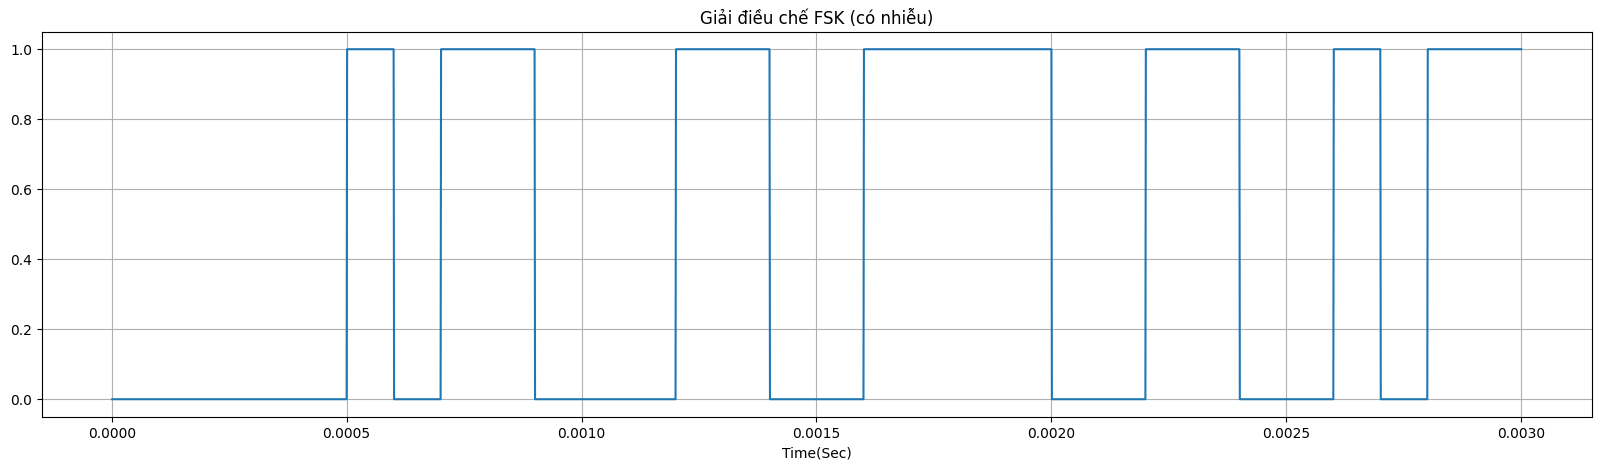

In [29]:
demod_n = np.empty((0,1), int)
for n in range(s, len(rt)+1, s):
    mm1 = cs1*rt[(n-(s)):n]
    mm2 = cs2*rt[(n-(s)):n]
    z1 = np.trapz(t2,mm1)
    z2 = np.trapz(t2,mm2)
    rz1 = np.round(2*z1/Tb)
    rz2 = np.round(2*z2/Tb)
    if rz1 > 0.5:
        a = 1
    elif rz2 > 0.5:
        a = 0
    demod_n = np.append(demod_n, a)
rdigit_n = np.empty((0,1), int)
for n in range(0, len(demod_n)):
    if demod_n[n] == 1:
        rsig = np.ones(nb)
    else:
        rsig = np.zeros(nb)
    rdigit_n = np.append(rdigit_n, rsig)
t3 = np.arange(Tb/nb,nb*len(demod_n)*(Tb/nb)+(Tb/nb),Tb/nb)
plt.title("Giải điều chế FSK (có nhiễu)")
plt.xlabel('Time(Sec)')
plt.grid()
plt.plot(t3, rdigit_n)
plt.show()

In [30]:
cnt = 0
for i in range(len(demod_n)):
    if x[i] != demod_n[i]:
        cnt = cnt + 1
print("bit error probability: ", cnt/len(x))

bit error probability:  0.2
